In [1]:
#Importing all the required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Loading the datasets
df= pd.read_csv("Advertising.csv")

In [3]:
#Checking the format of dataset by printing first 5 rows
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#Checking no. of rows and colums in dataset
df.shape

(200, 5)

In [6]:
#Describing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
#Checking if there is any duplicate row present or not
print("No. of duplicate rows is", df.duplicated().sum())

No. of duplicate rows is 0


In [9]:
#Finding co-relations between data elements
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


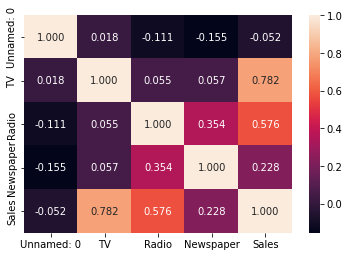

In [12]:
#Drawing the heatmap using seaborn package
sns.heatmap(df.corr(), annot=True, fmt=".3f")

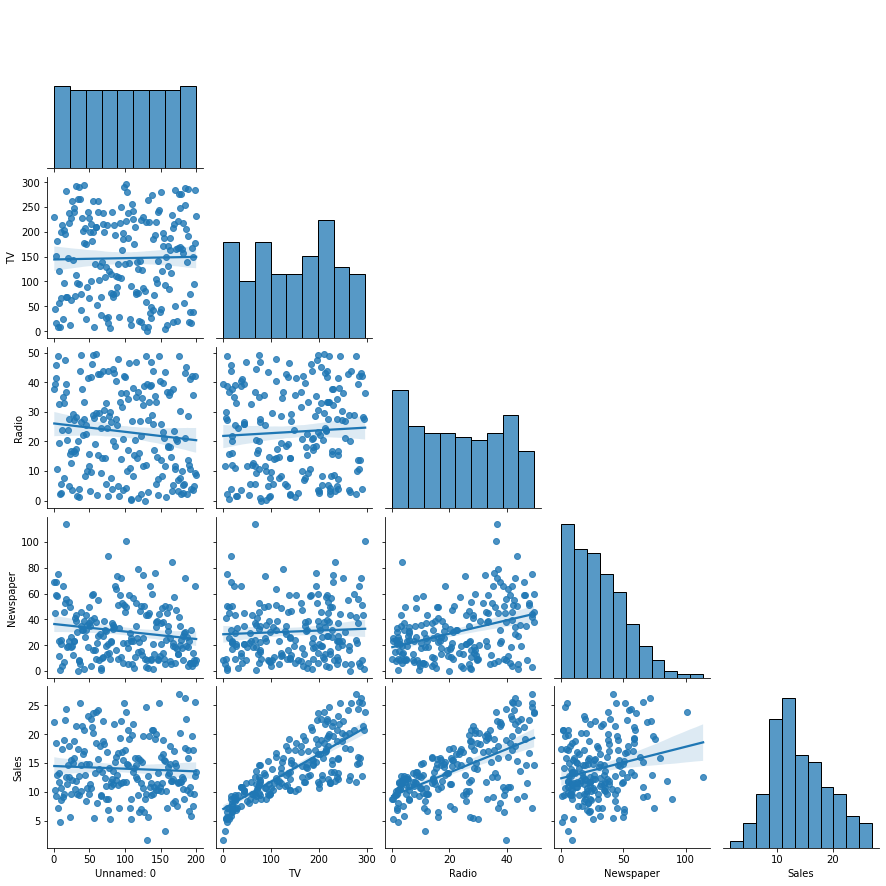

In [13]:
#Drawing the pairplot for dataset
sns.pairplot(df, kind="reg",corner=True)

In [14]:
#Preparing the data for training and testing the model
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
#Splitting the entire dataset into training and testing dataset 
#Here, we have split 85% data as training data and 15% data as testing data
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.15, random_state=55)

print("Shape of X_train", X_train.shape) #Checking no. of rows & columns of training data
print("Shape of y_train", y_train.shape) #Checking no. of rows & columns of testing data

Shape of X_train (170, 4)
Shape of y_train (170,)


We will use Multiple regression algorithm for training and testing the model.

In [16]:
multiple_reg= LinearRegression()

In [17]:
multiple_reg.fit(X_train, y_train)

LinearRegression()

In [18]:
#Testing the model on test data
pred = multiple_reg.predict(X_test)

In [19]:
compare= pd.DataFrame({"y_test":list(y_test), "pred":list(pred)})
compare.head()

,y_test,pred
0,11.0,9.671610
1,12.2,12.013788
2,9.5,11.776022
3,9.7,7.900421
4,19.7,19.352755


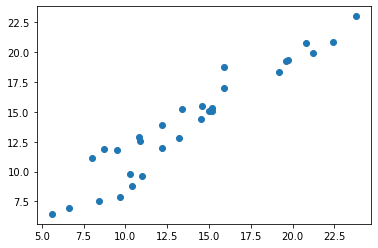

In [20]:
#Plotting scatter plot of predicted value vs actual testing value
plt.scatter(y_test, pred)

In [21]:
from sklearn import metrics


In [22]:
accuracy = metrics.r2_score(y_test, pred)
print("R2 Score:{}".format(accuracy))

R2 Score:0.9075059925606692


From the above output, we can see that the efficiency of model is 90.75%

In [24]:
from sklearn.preprocessing import StandardScaler
StSc=StandardScaler()
x_train_scaled=StSc.fit_transform(X_train)

In [25]:
x_test_scaled=StSc.fit_transform(X_test)

Training and testing model using Linear Regression  model.

In [26]:
linReg = LinearRegression()

In [27]:
linReg.fit(x_train_scaled,y_train)

LinearRegression()

In [28]:
y_pred = linReg.predict(x_test_scaled)

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9011828801300117

From the above output, we see that the accuracy for Linear Regression is 90.12%

From the above two algorithms's accuracy, we see that the model buildt using Multiple regression model has slightly more accuracy than the model buildt using Linear Regression model. So, we can conclude that both the model are good for prediction on this dataset as accuracy is above 90%.